   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   PersonalLoan  SecuritiesAccount  CDAccount  Online  CreditCard  
0             0                  1          0       0           0  
1             0                  1          0       0           0  
2             0                  0          0       0           0  
3             0                  0          0       0           0  
4             0                  0          0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #  

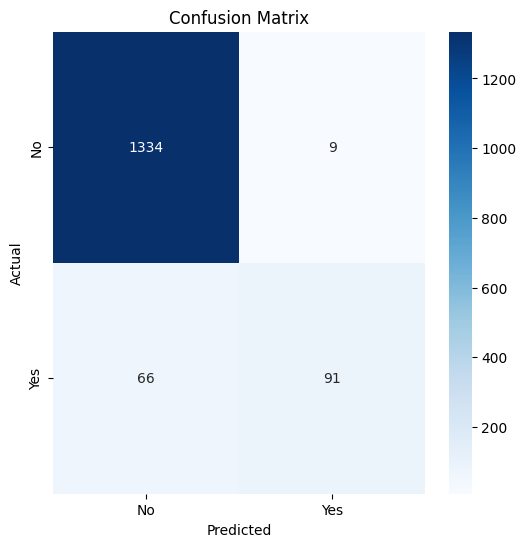

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv('UniversalBank (1).csv')

# Step 3: Inspect the data
print(data.head())  # Check the first few rows of the dataset
print(data.info())  # Check the structure of the data

# Step 4: Data Preprocessing
# Remove 'ID' column since it’s not useful for the model
data = data.drop(['ID'], axis=1)

# Step 6: Define features and target variable
X = data.drop('PersonalLoan', axis=1)  # Drop target column for features
y = data['PersonalLoan']  # 'PersonalLoan' is the target variable

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Scale the features (important for SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Train the SVM model
svm = SVC(kernel='linear')  # You can use 'linear', 'poly', 'rbf', etc.
svm.fit(X_train_scaled, y_train)

# Step 10: Predict on the test data
y_pred = svm.predict(X_test_scaled)

# Step 11: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Step 12: Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

